# Titanic Data

In this project, I am going to use several machine learning techniques to create different models that predict which passengers survived the Titanic shipwreck.

Then, I will provide a comparison between several models in terms of accuracy.

In [1]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In Kaggle, the data is already splitted into two parts: traingin and test data.
The training data is labled however the test data is not labled and the code is evaluated based on this test result.

In [2]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Passenger ID
Passenger ID seems irrelevant to the label so it can be removed.

In [14]:
train_data.drop(['PassengerId'],axis=1,inplace=True)

In [15]:
test_data.drop(['PassengerId'],axis=1,inplace=True)

In [26]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pclass

In [21]:
train_data['Pclass'].isna().sum()

0

In [22]:
train_data['Pclass'].isna().sum()

0

There is no missing value for Pclass feature. 

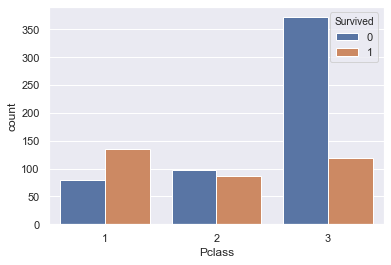

In [18]:
sns.countplot(x='Pclass',hue='Survived',data=train_data)

It seems that chances to survive are higher for class 1 and 2 passengers.

It is a categorical feature and it should be transformed to dummies.

In [33]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Pclass'],drop_first=True,prefix='Pclass')],axis=1)

In [34]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [35]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Pclass'],drop_first=True,prefix='Pclass')],axis=1)

In [36]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


It is time to drop the Pclass feature but I prefer to keep it for now. It might be need for further analysis.
Let's save the changes so far.

In [37]:
# Checkpoint
Pclass_processed_training = train_data.copy()
Pclass_processed_test = test_data.copy()

### Name
surviving in a disaster does not seem to be related to the name of a person. Therefore, it is safe to drop the name column.

In [38]:
train_data.drop(['Name'],inplace=True,axis=1)
test_data.drop(['Name'],inplace=True,axis=1)

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Sex

It is a categorical data and it is saved in the form of string. 
I use the map method provided in pandas to replace male with 1 
and female with 0.


In [41]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [45]:
train_data['Is male?']=train_data['Sex'].map({'male':1,'female':0})

In [48]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Is male?
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


In [42]:
test_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [46]:
test_data['Is male?']=test_data['Sex'].map({'male':1,'female':0})

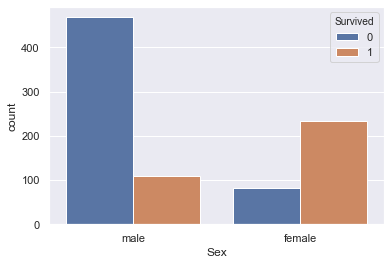

In [47]:
sns.countplot(x='Sex',hue='Survived',data=train_data)

It seems that the women are most likely to survive.

Now I can simply drop the 'Sex' column.


In [50]:
train_data.drop(['Sex'],inplace=True,axis=1)
test_data.drop(['Sex'],inplace=True,axis=1)

In [51]:
# Checkpoint
Sex_processed_training = train_data.copy()
Sex_processed_test = test_data.copy()

### Age

In [53]:
train_data['Age'].isna().sum()

177

In [54]:
test_data['Age'].isna().sum()

86

In [59]:
train_data.corr()['Age']

Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Pclass_2    0.006954
Pclass_3   -0.312271
Is male?    0.093254
Name: Age, dtype: float64

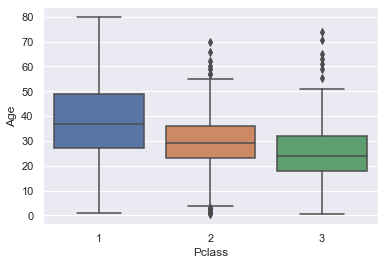

In [61]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

It seems that there is a correlation between age and pclass. Therefore, instead of filling all null values with average or median of age, I fill those missing values with median of each pclass.

In [110]:
class_1 = train_data[train_data['Pclass']==1]['Age'].median()

In [111]:
class_2 = train_data[train_data['Pclass']==2]['Age'].median()

In [112]:
class_3 = train_data[train_data['Pclass']==3]['Age'].median()

In [117]:
def age_estimator(col):
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        if pclass == '1':
            return class_1
        elif pclass =='2':
            return class_2
        else:
            return class_3
    else:
        return age

In [119]:
train_data['Age']=train_data[['Age','Pclass']].apply(age_estimator,axis=1)

In [121]:
train_data['Age'].isna().sum()

0

In [122]:
test_data['Age']=test_data[['Age','Pclass']].apply(age_estimator,axis=1)

In [123]:
train_data['Age'].isna().sum()

0

In [124]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Is male?
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,1,1,35.0,1,0,113803,53.1000,C123,S,0,0,0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,0,1,1


In [125]:
# Checkpoint
Age_processed_training = train_data.copy()
Age_processed_test = test_data.copy()

In [126]:
train_data['SibSp'].isna().sum()

0

In [128]:
test_data['SibSp'].isna().sum()

0

In [129]:
train_data['Parch'].isna().sum()

0

In [130]:
test_data['SibSp'].isna().sum()

0

### SibSp and Parch
These two columns have no missing values and are numerical.
I will leave them untouched.

### Ticket

Ticket is in the form of string and it does not seem to give any insight about the probability of survival.
It seems harmless to drop this column.

In [132]:
train_data.drop(['Ticket'],axis=1,inplace=True)

In [133]:
test_data.drop(['Ticket'],axis=1,inplace=True)

In [134]:
# Checkpoint
Ticket_processed_training = train_data.copy()
Ticket_processed_test = test_data.copy()

### Fare

In [135]:
train_data['Fare'].isna().sum()

0

In [136]:
test_data['Fare'].isna().sum()

1

In [137]:
train_data.corr()['Fare']

Survived    0.257307
Pclass     -0.549500
Age         0.107554
SibSp       0.159651
Parch       0.216225
Fare        1.000000
Pclass_2   -0.118557
Pclass_3   -0.413333
Is male?   -0.182333
Name: Fare, dtype: float64

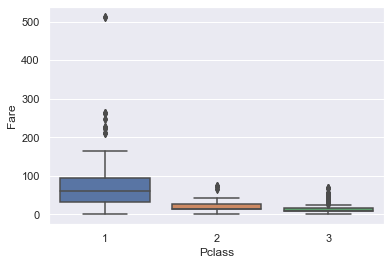

In [139]:
sns.boxplot(x='Pclass',y='Fare',data=train_data)

The fare is correlated with the pclass feature. So, a median or mean can be used to estimate the missing value.

In [142]:
class_1 = train_data[train_data['Pclass']==1]['Fare'].median()
class_2 = train_data[train_data['Pclass']==2]['Fare'].median()
class_3 = train_data[train_data['Pclass']==3]['Fare'].median()

In [140]:
def fare_estimator(col):
    fare = col[0]
    pclass = col[1]
    
    if pd.isnull(fare):
        if pclass == '1':
            return class_1
        elif pclass =='2':
            return class_2
        else:
            return class_3
    else:
        return fare

In [146]:
test_data['Fare']=test_data[['Fare','Pclass']].apply(fare_estimator,axis=1)

In [147]:
test_data['Fare'].isna().sum()

0

In [148]:
# Checkpoint
Fare_processed_training = train_data.copy()
Fare_processed_test = test_data.copy()

### Cabin

In [149]:
train_data['Cabin'].isna().sum()

687

In [150]:
test_data['Cabin'].isna().sum()

327

There are many missing values for cabin feature. Even the existing elements does not seem to
provide any interpretable results so I drop this column.

In [151]:
train_data.drop(['Cabin'],axis=1,inplace=True)
test_data.drop(['Cabin'],axis=1,inplace=True)

In [152]:
# Checkpoint
Cabin_processed_training = train_data.copy()
Cabin_processed_test = test_data.copy()

### Embarked


In [153]:
train_data['Embarked'].isna().sum()

2

In [154]:
test_data['Embarked'].isna().sum()

0

In [155]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

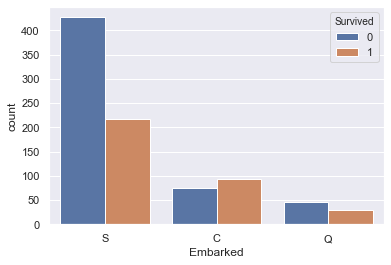

In [156]:
sns.countplot(x='Embarked',hue='Survived',data= train_data)

There is two missing values and I simply replace them with the most common values 'S'.

In [157]:
train_data['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Since it is a categorical data, I replace it with dummy variables.

In [158]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Embarked'],drop_first=True,prefix='Embarked')],axis=1)

In [159]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,Is male?,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,S,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,0,1,1,0,1


In [160]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'],drop_first=True,prefix='Embarked')],axis=1)

In [161]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,Is male?,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,Q,0,1,1,1,0
1,3,47.0,1,0,7.0000,S,0,1,0,0,1
2,2,62.0,0,0,9.6875,Q,1,0,1,1,0
3,3,27.0,0,0,8.6625,S,0,1,1,0,1
4,3,22.0,1,1,12.2875,S,0,1,0,0,1


Now it is time to drop embarked and pclass columns.

In [162]:
train_data.drop(['Embarked','Pclass'],inplace=True,axis=1)

In [163]:
test_data.drop(['Embarked','Pclass'],inplace=True,axis=1)

In [166]:
train_data.to_csv('Preprocessed_train_data.csv',index=False)

In [167]:
test_data.to_csv('Preprocessed_test_data.csv',index=False)